<a href="https://colab.research.google.com/github/MuhammadM20/example-notebooks/blob/master/UNIV_3360_Clustering_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Homework

In this homework, you will be demonstrating your understanding of the unsupervised learning (clustering) methods that we went over in class. Refer to the lecture slides on Brightspace for explainations of the supervised learning algorithms and the in-class example notebooks for examples on how to use Python and Scikit-learn for supervised learning.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# Iris Data

The first dataset that we  will be analyzing is the Iris data. We have worked with this data before, but in case you have forgotten, the task is to classify different types of Iris flowers based on four physical measurements. For this assignment, we will be discarding the known labels and attempting to determine the type of flower by clustering on two of the features.

Run the cell below to load the data and format it into a dataframe.

In [11]:
iris_data = datasets.load_iris()

X_iris = iris_data.data
feature_names = iris_data.feature_names

data = pd.DataFrame(X_iris, columns=feature_names)
data = data[['petal length (cm)','sepal length (cm)']]
data.head()

,petal length (cm),sepal length (cm)
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0


## K Means

First, we will cluster the Iris data using K-means.

### Known Number of Clusters

We know from prior knowledge that this dataset contains three type of iris flowers, and as a result, three classes. In the cell below, create and fit a KMeans clustering with K=3 for the iris data. Print the labels and the centroids that KMeans produces.

In [12]:
k_means = KMeans(n_clusters=3, random_state=4)
k_means.fit(X_iris)

k_means_labels = k_means.labels_
print("Labels: ", k_means_labels)
print()

k_means_centroids = k_means.cluster_centers_
print("Centroids: \n", k_means_centroids)

Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

Centroids: 
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Since we are only using two features, we are able to plot the data and visualize the classification. I have defined a function for you in the cell below which takes as input the data, the generated cluster labels (as you printed them above), and a few parameters for labeling the graph and plots the produced cluster in different colors.

**Important Note:** The input to the *plot_cluster* function must be a pandas dataframe, not a numpy array.

In [0]:
def plot_cluster(data, labels, plot_title):
  plt.figure(figsize=(10,5))
  unique_labels = set(labels)
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  colors = ['b','g','r','c','m','y','k']

  for k in unique_labels:
      class_member_mask = (labels == k)
      xy = data[class_member_mask & ~core_samples_mask]
      plt.scatter(xy[xy.columns[0]], xy[xy.columns[1]], color=colors[k%7])

  plt.title(plot_title)
  plt.xlabel(data.columns[0])
  plt.ylabel(data.columns[1])
  plt.show()

In the cell below, use the *plot_clusters* function from above to plot the result of the KMeans algorithm.

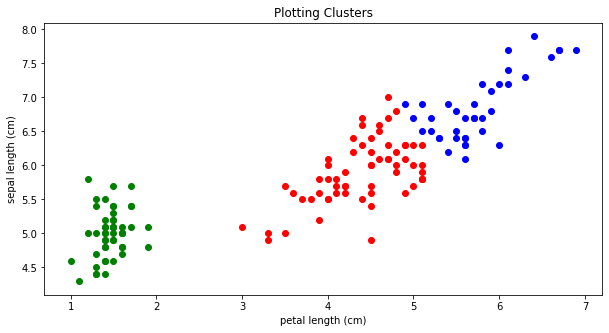

In [14]:
plot_cluster(data, k_means_labels, "Plotting Clusters")

**Question:** Brielfly dicuss the results of thr KMeans clustering including whether you believe the algorithm did a good job with the data for not.

**Answer:** This clustering is fairly ok and sensible. There could be better clustering in the group of data points to the upper right, possibly into one group (it looks like a linear trend for the entire group).

### Unkown Number of Clusters

Now we will evaluate the KMeans clustering without using our pior knowledge of the number of different Iris flowers.

**Question:** What types of metrics can we use to evaluate the performance of the KMeans algorithm in a trade-off curve?

**Answer:** You can use the metric of inertia measuring the sum of squared distances of samples to their closest cluster center. When you run KMeans for a variety of K values inertia will better show you how the clustering works.

In the cell below, please fit KMeans for all values of K between 1 and 10 and plot the resulting trade-off curve.

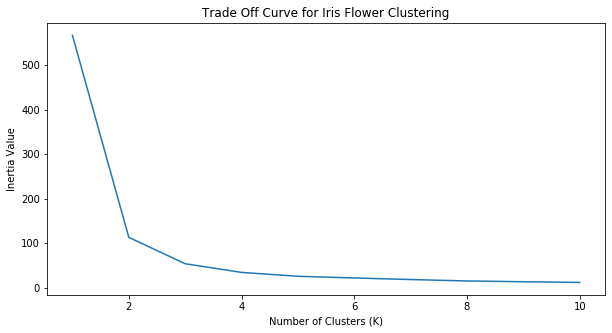

In [24]:
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for k in k_values:
  k_means = KMeans(n_clusters=k, random_state=4)
  k_means.fit(data)
  inertia_values.append(k_means.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k_values, inertia_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia Value")
plt.title("Trade Off Curve for Iris Flower Clustering")
plt.show()



**Question:** Based on the results of the trade-off curve, what value of K is optimal for the Iris data? Explain your reasoning.

**Answer:** The value of K most optimal for the Iris data is K=2. The "knee of the curve" occurs at this point.

Based on your answer above, fit KMeans for the optimal value of K and plot the resulting clustering.

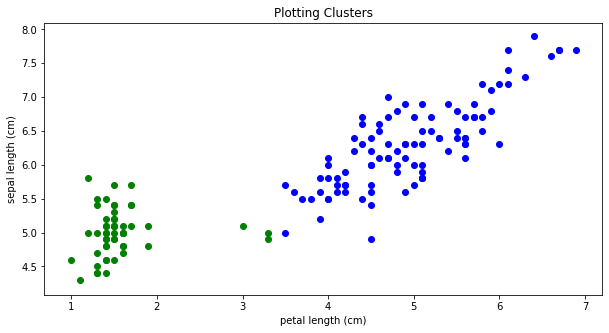

In [25]:
k_means = KMeans(n_clusters=2, random_state=4)
k_means.fit(X_iris)

k_means_labels = k_means.labels_

plot_cluster(data, k_means_labels, "Plotting Clusters")

**Question:** How do the results of this clustering compare to the results of K=3 from earlier?

**Answer:** This clustering groups the entire upper right collection of data points into one cluster which is what I recommended above. It is interesting how the green cluster extends into the right, but the centrioid of the blue cluster is likely to far up and to the right. 

## Agglomerative Hierarchical 

Now we will use a hierarchical clustering algorithm on the Iris data. Fit an average linkage agglomerative hierarchical clustering set to predict 3 clusters. Plot the results of the clustering.

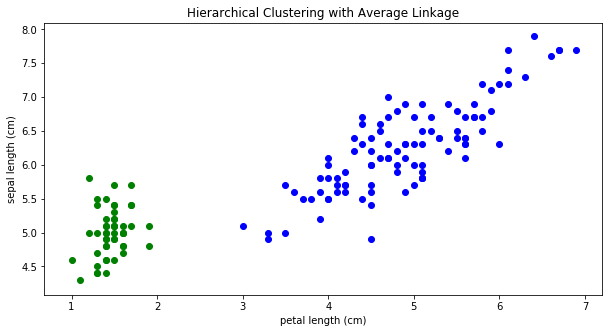

In [26]:
hier = AgglomerativeClustering(n_clusters=2, linkage='average')
hier.fit(X_iris)

plot_cluster(data, hier.labels_, "Hierarchical Clustering with Average Linkage")

**Question:** Briefly decribe the results of the clustering. Is this a better or worse result than KMeans?

**Answer:** The hierarchical clustering created two cluster groups that look more distinct than those created by the KMeans clusters above.

Now fit an agglomerative hierarchical clustering with one other type of linkage of your choosing. Plot the results of the clustering.

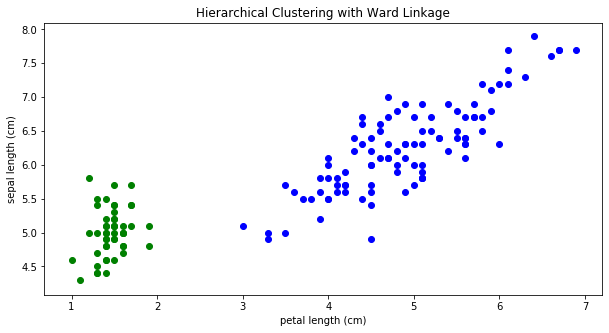

In [27]:
hier = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier.fit(X_iris)

plot_cluster(data, hier.labels_, "Hierarchical Clustering with Ward Linkage")

**Question:** Briefly describe the results of the clustering. How did it change from average linkage?

**Answer:** This clustering results in two clusters that are not different from the average linkage performed above.

**Question:** In general, how do you determine what type of linkage to use in hierarchical clustering?

**Answer:** Based off of my research the linkaged used depends on your data. You must be aware of each type and how it will impact your results. Each linkage involves different grouping techniques based on the distance between points so you must be prepared to understand how differently each impacts your results.



## DBSCAN

Now we will use a density based clustering algorithm on the Iris data. Fit a DBSCAN clustering using the default parameters and plot the results of the clustering.

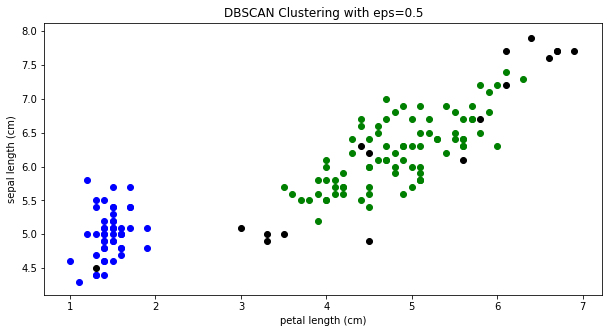

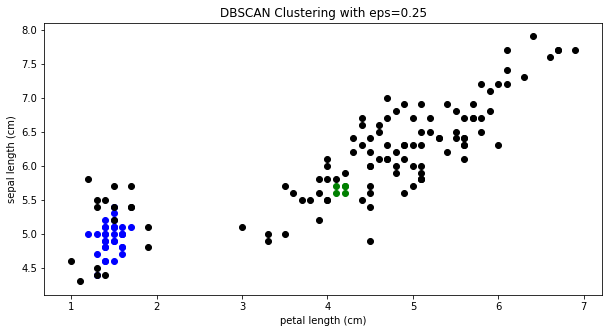

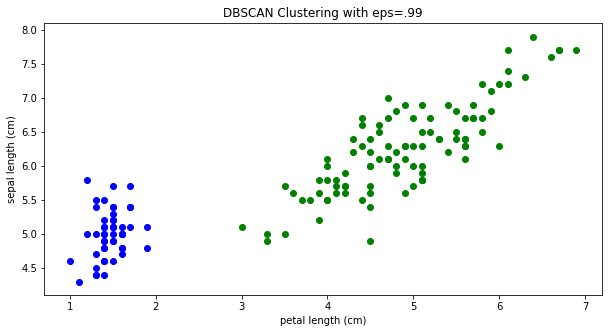

In [41]:
db = DBSCAN()
db.fit(X_iris)
plot_cluster(data, db.labels_, "DBSCAN Clustering with eps=0.5")

db = DBSCAN(eps=0.25)
db.fit(X_iris)
plot_cluster(data, db.labels_, "DBSCAN Clustering with eps=0.25")

db = DBSCAN(eps=0.99)
db.fit(X_iris)
plot_cluster(data, db.labels_, "DBSCAN Clustering with eps=.99")

**Question:** Briefly describe the results of the clustering. Why did DBSCAN generate the clusters that it did? Is this a better or worse result than KMeans and Hierarchical clustering? What happens if you vary the value of eps?

**Answer:** Density based clustering groups together points in high dense areas based off of distance measuring and marks outliers as those points located in low density areas. The first measure marked the outliers well but interestingly omitted points in what I would deem high dense areas. The result was better at clustering some outliers, but there were randomly outliers identified that seemed to be closer to other points so I would still opt for Hierarchical clustering or KMeans. When you vary the value of eps, the clusters change according to the distance between points. Points with distance at or below the specified value of eps are considered neighbors. In this case, when eps is lowered, less points are considered neighbors than with a higher eps. 

# Completely Unknown Data

Now we will test your understanding of these algorithms using a completely new and unknown dataset. We have generated a two feature dataset for you to analyze for the purposes of this assignment. The link for the data can be found in the cell below.

In preparation for your upcoming projects, this section is intentionally left much more open, as you will usually not have someone giving you step-by-step instructions on what to analyze and produce as we have for most of these homework assignments. 

Please analyze the provided data using any methods you think are sensibe and required. The use of clustering algorithms is required, but any other methods and analysis is at your discretion. During grading, we will run the code cells below in the order they appear (top to bottom). They should generate and display any relevant results. In addition, please include a text cell with a few paragraphs describing your findings. Here are some things that you should consider and answer in your analysis:

* How do K Means, Hierarchical, and DBSCAN compare? Which is best?
* Why are each of the clustering algorithms producing the results that they do?
* What happens if you vary the hyper-parameters (number of clusters and epsilon) of these algorithms?
* What is the optimal values for the hyper-parameters and how did you determine them?
* How many meaningful clusters are there in the data?
* Why is clustering a relevent way to analyze this data?
* Are there any other way in which this data could be analyzed?

In [0]:
data_path = "https://raw.githubusercontent.com/univ-3360-vu-smartcities/example-notebooks/master/datasets/unknown_data.csv"

# Reflection Questions

**Question:** Under what circumstances do each of the different types of clustering algorithms (partitional, hierarchical, density based) perform better than each other?

**Answer:**

**Question:** What is the effect of the hyperparameters for each algorithm?

**Answer:**

**Question:** How do you determine what values of hyperparameters to use?

**Answer:**

**Question:** What are some ways that we can evaluate the performance of a clustering algorithm?

**Answer:**